In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('newtrial_-_Sheet_1_-_01_District_wise_crim_2.csv')
data.head(5)

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,...,4,118,0,19,1,9,0,0,323,658
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,...,2,97,0,17,3,4,0,0,328,608
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,...,8,110,0,9,2,7,0,0,318,644
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,...,9,105,0,6,3,5,0,6,387,748
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,...,6,79,0,11,1,5,0,3,362,682


In [3]:
grouped_data = data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()
grouped_data.rename(columns={'TOTAL IPC CRIMES': 'TOTAL CRIMES'}, inplace=True)
print(grouped_data)


             STATE/UT  TOTAL CRIMES
0       A & N ISLANDS          9102
1      ANDHRA PRADESH       2018981
2   ARUNACHAL PRADESH         27652
3               ASSAM        597764
4               BIHAR       1346293
5          CHANDIGARH         40807
6        CHHATTISGARH        561027
7        D & N HAVELI          4651
8         DAMAN & DIU          2948
9            DELHI UT        633174
10                GOA         32051
11            GUJARAT       1385775
12            HARYANA        595303
13   HIMACHAL PRADESH        154948
14    JAMMU & KASHMIR        259155
15          JHARKHAND        422351
16          KARNATAKA       1481063
17             KERALA       1437459
18        LAKSHADWEEP           743
19     MADHYA PRADESH       2413770
20        MAHARASHTRA       2273436
21            MANIPUR         35072
22          MEGHALAYA         25249
23            MIZORAM         26146
24           NAGALAND         13133
25             ODISHA        647946
26         PUDUCHERRY       

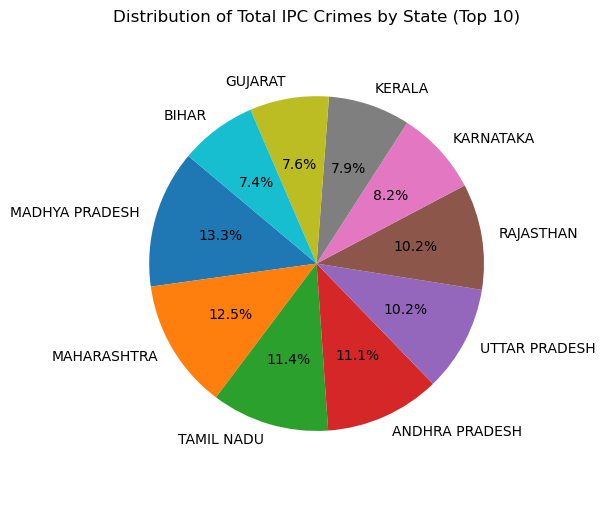

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_10_states = grouped_data.sort_values(by='TOTAL CRIMES', ascending=False).head(10)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_10_states['STATE/UT'], top_10_states['TOTAL CRIMES'])))
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
plt.pie(top_10_states['TOTAL CRIMES'], labels=top_10_states['STATE/UT'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Total IPC Crimes by State (Top 10)')
plt.tight_layout()
plt.show()

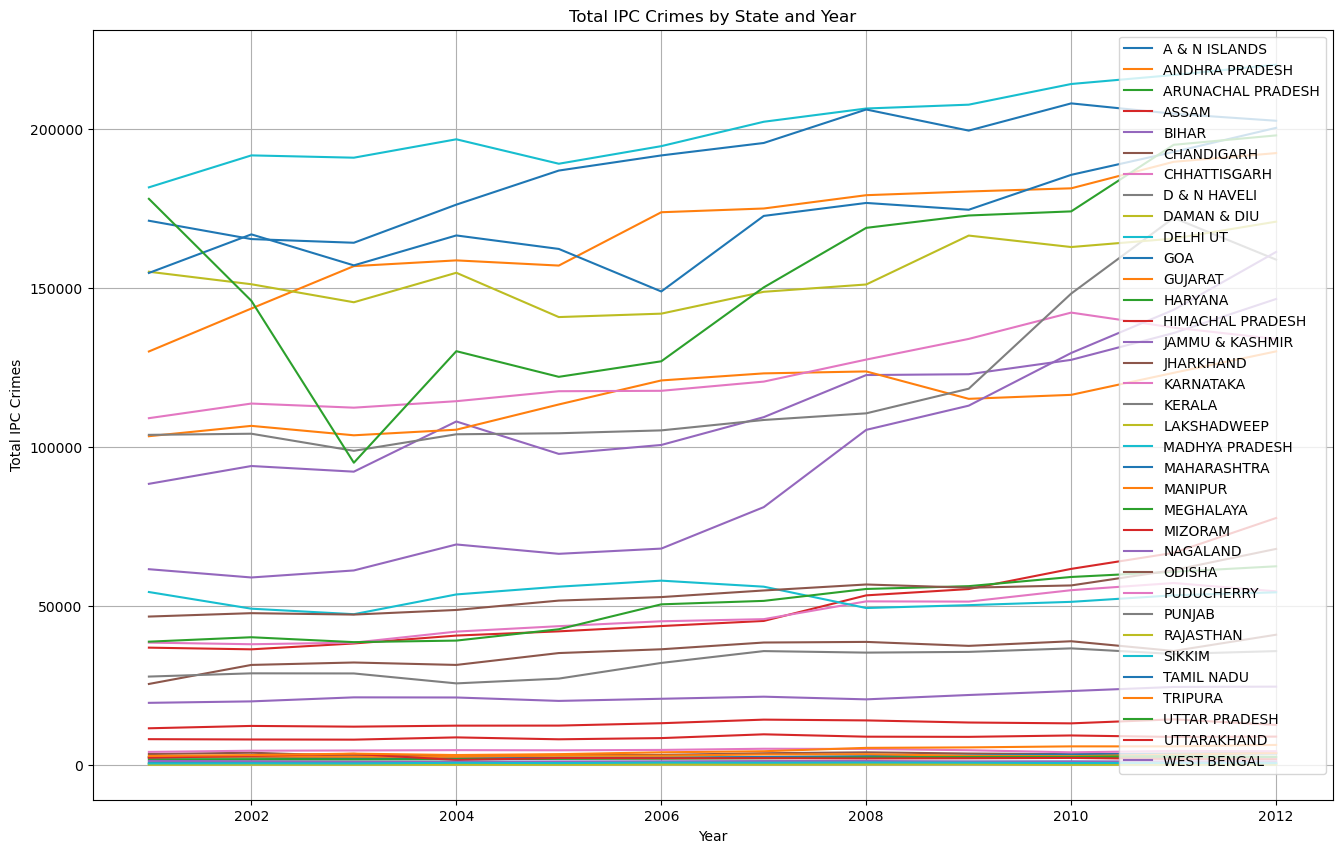

In [13]:
# Group the data by 'STATE/UT' and 'YEAR' and sum the 'TOTAL IPC CRIMES'
grouped_data = data.groupby(['STATE/UT', 'YEAR'])['TOTAL IPC CRIMES'].sum().reset_index()

# Plotting
plt.figure(figsize=(16, 10))

# Loop through each state and plot a line graph for the total IPC crimes over the years
for state in grouped_data['STATE/UT'].unique():
    state_data = grouped_data[grouped_data['STATE/UT'] == state]
    plt.plot(state_data['YEAR'], state_data['TOTAL IPC CRIMES'], label=state)

plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes by State and Year')
plt.legend()
plt.grid(True)
plt.show()


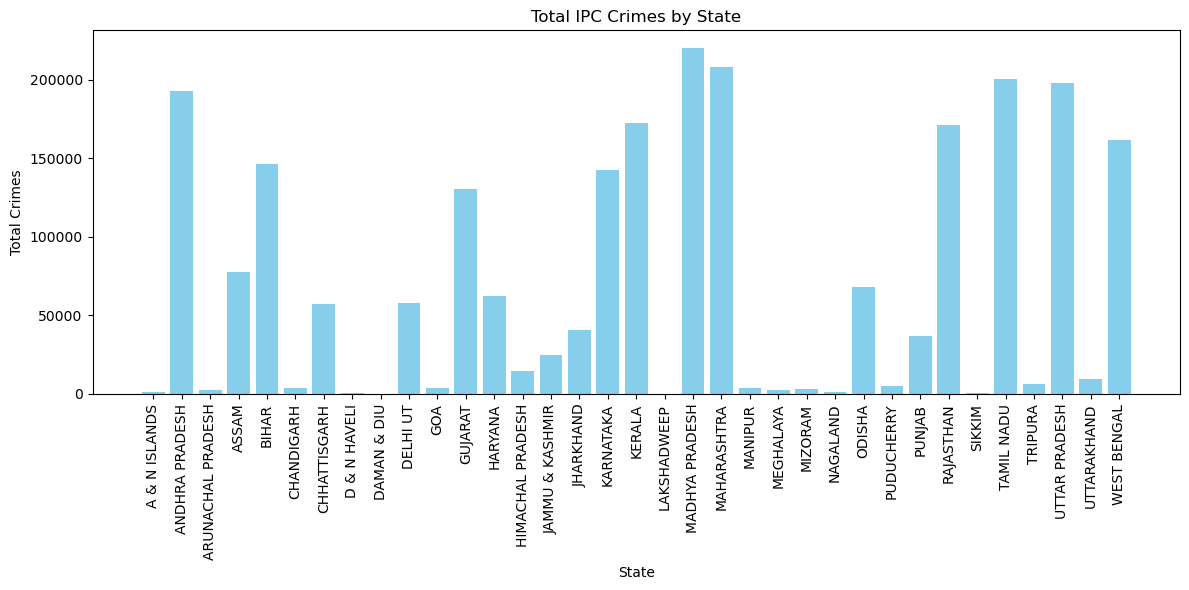

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['STATE/UT'], grouped_data['TOTAL IPC CRIMES'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Crimes')
plt.title('Total IPC Crimes by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

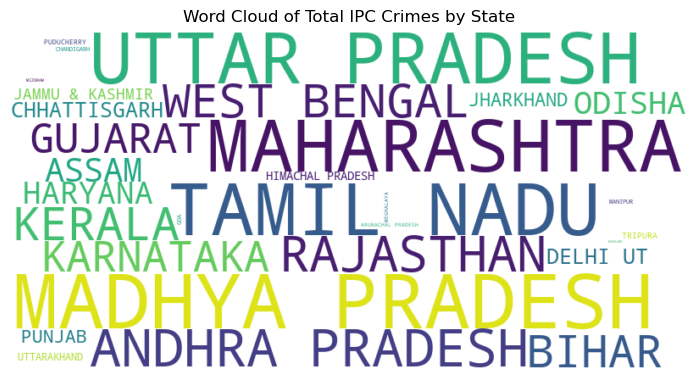

In [16]:
wordcloud_dict = dict(zip(grouped_data['STATE/UT'], grouped_data['TOTAL IPC CRIMES']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Plotting
plt.figure(figsize=(14, 10))

# Plot the word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Total IPC Crimes by State')


plt.tight_layout()
plt.show()

# LinearRegression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('newtrial_-_Sheet_1_-_01_District_wise_crim_2.csv')
data.head(5)

X = data[['STATE/UT', 'YEAR']]
y = data['TOTAL IPC CRIMES']

# Convert 'STATE/UT' to categorical variable
X = pd.get_dummies(X, columns=['STATE/UT'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

state = 'Gujarat'  
future_year = 2027
X_input = pd.DataFrame([[future_year, state]], columns=['YEAR', 'STATE/UT'])
X_input = pd.get_dummies(X_input, columns=['STATE/UT'], drop_first=True)
missing_cols = set(X_train.columns) - set(X_input.columns)
for col in missing_cols:
    X_input[col] = 0

X_input = X_input[X_train.columns]

y_pred = model.predict(X_input)

print("Predicted total IPC crimes for", state, "in", future_year, ":", y_pred[0])


Predicted total IPC crimes for Gujarat in 2027 : 35589.10327684274


#  RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_input)

print("Predicted total IPC crimes for", state, "in", future_year, "using Random Forest:", y_pred_rf[0])


Predicted total IPC crimes for Gujarat in 2027 using Random Forest: 779.87


#  KNeighborsRegressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_input)
print("Predicted total IPC crimes for", state, "in", future_year, "using KNN:", y_pred_knn[0])



Predicted total IPC crimes for Gujarat in 2027 using KNN: 43164.8


# DecisionTreeRegressor

In [32]:

from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_input)
print("Predicted total IPC crimes for", state, "in", future_year, "using Decision Tree:", y_pred_dt[0])


Predicted total IPC crimes for Gujarat in 2027 using Decision Tree: 683.0


# Model Comparison for Predicting Total IPC Crimes

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_input)

# Random Forest Model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_input)

# K-Nearest Neighbors (KNN) Model
model_knn = KNeighborsRegressor(n_neighbors=5) 
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_input)

# Decision Tree Model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_input)

# Calculate MSE for each model
mse_lr = mean_squared_error(y_train, model_lr.predict(X_train))
mse_rf = mean_squared_error(y_train, model_rf.predict(X_train))
mse_knn = mean_squared_error(y_train, model_knn.predict(X_train))
mse_dt = mean_squared_error(y_train, model_dt.predict(X_train))

# Print predictions and MSE
print("Predicted total IPC crimes for", state, "in", future_year, "using Linear Regression:", y_pred_lr[0])
print("Predicted total IPC crimes for", state, "in", future_year, "using Random Forest:", y_pred_rf[0])
print("Predicted total IPC crimes for", state, "in", future_year, "using KNN:", y_pred_knn[0])
print("Predicted total IPC crimes for", state, "in", future_year, "using Decision Tree:", y_pred_dt[0])

# Compare the models
print("Linear Regression Training Mean Squared Error:", mse_lr)
print("Random Forest Training Mean Squared Error:", mse_rf)
print("KNN Training Mean Squared Error:", mse_knn)
print("Decision Tree Training Mean Squared Error:", mse_dt)

# Find the model with the lowest MSE
models = {
    'Linear Regression': mse_lr,
    'Random Forest': mse_rf,
    'KNN': mse_knn,
    'Decision Tree': mse_dt
}
best_model = min(models, key=models.get)
print("Best model:", best_model)


Predicted total IPC crimes for Gujarat in 2027 using Linear Regression: 35589.10327684274
Predicted total IPC crimes for Gujarat in 2027 using Random Forest: 779.87
Predicted total IPC crimes for Gujarat in 2027 using KNN: 43164.8
Predicted total IPC crimes for Gujarat in 2027 using Decision Tree: 683.0
Linear Regression Training Mean Squared Error: 102226333.80384223
Random Forest Training Mean Squared Error: 6309830.062061606
KNN Training Mean Squared Error: 1643145942.7245235
Decision Tree Training Mean Squared Error: 0.0
Best model: Decision Tree
